#TEC MONTERREY - MNA - 2022
#CIENCIA DE DATOS
#Andrés Julián López Hurtado A01793899


# Linear Models

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

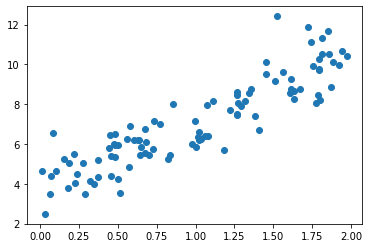

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

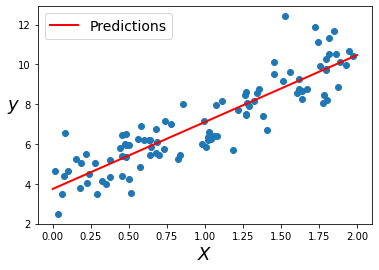

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

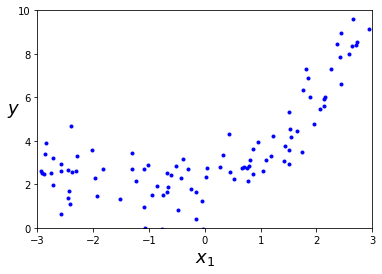

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

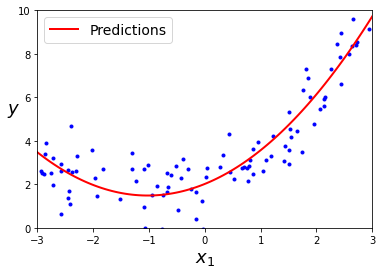

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

Text(0, 0.5, 'Costo por unidad, $/ un')

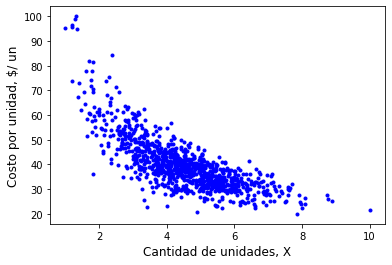

In [27]:
plt.plot(X,y,'b.')
plt.xlabel("Cantidad de unidades, X", fontsize=12)
plt.ylabel("Costo por unidad, $/ un", rotation=90, fontsize=12)


Lineal: Hoja de ruta.
- Dividir los datos en entrenamiento y prueba. 80% de entrenamiento, el resto para prueba.
- Aplicar el modelo lineal al conjunto de entrenamiento.
- Al modelo de entrenamiento sacar los datos para construcción de la ecuación y luego generar sus métricas (R2 y MAE).
- Visualizar la distribución de los errores.

In [28]:
#Generando el conjunto de validación y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

###Regresion lineal###

In [29]:
#lineal

#primero genero el cosntructor con la regresión lineal.
lin_reg = LinearRegression(fit_intercept=True)

#Luego entreno el modelo
lin_reg.fit(X_train, y_train)

#Obtengo los valores de pendiente e instersección

lin_reg.coef_, lin_reg.intercept_



(array([-5.97912772]), 66.79997932683362)

Ecuación de la regresión lineal:


$\hat{y} =  -5.98X +66.78$

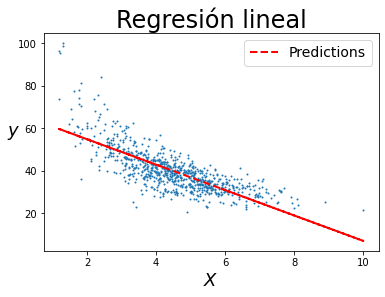

In [30]:
#Visualización

#en la siguiente línea voy a calcular el valor de y predicho por el modelo de regresión. Voy a mostrar apenas los datos de entrenamiento
y_hat = lin_reg.predict(X_train)

plt.scatter(X_train, y_train, s = 1)
plt.plot(X_train, y_hat, "r--", linewidth=2, label="Predictions")

plt.title("Regresión lineal", fontsize = 24)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

#Cálculo de errores con los datos de entrenamiento

print('-------- Datos de entrenamiento -----------\n')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat)))
print('r2_score',r2_score(y_train, y_hat))

#Cálculo de errores con los datos de prueba

y_hat_2 = lin_reg.predict(X_test)

print('-------- Datos de prueba -----------\n')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_2)))
print('r2_score',r2_score(y_test, y_hat_2))


MAE = []
R2 = []

MAE.append(metrics.mean_absolute_error(y_test, y_hat_2))
R2.append(r2_score(y_test, y_hat_2))


-------- Datos de entrenamiento -----------

Error medio Absoluto (MAE): 4.885796539672615
Root Mean Squared Error: 6.8220153911183425
r2_score 0.5741612020971557
-------- Datos de prueba -----------

Error medio Absoluto (MAE): 5.033403667160277
Root Mean Squared Error: 7.067709647692056
r2_score 0.595798333672179


De los resultados anteriores vemos que:
1. Para el caso de la regresión lineal, el R2 indica que apenas el 59% de la variación total de los datos es explicada por el modelo. Esto es porque  claramente los datos no tienen un comportamiento lineal.
2. El valor cercano de R cuadrado en los conjuntos de validación y prueba muestra un modelo subentrenado. Vamos a tratar de mejorar el indicador cambiando el modelo.

###Regresión polinomial###

In [32]:
#polinomial.

#Por el comportamiento de los datos en el scatter, sobre todo los de el extermo derecho, creo que no se trata de una
#relación cuadrática. Al parecer es cúbica.

#Comienzo generando los datos

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Aquí creo el constructor para generar la transformación polinomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#Creo el constructor para la regresión lineal.
lin_reg = LinearRegression(fit_intercept= True)


#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de los coeficientes
lin_reg.coef_, lin_reg.intercept_




(array([-31.83069901,   4.58905775,  -0.23734936]), 109.50904482461846)

Ecuación de la regresión lineal:


$\hat{y} =  -31.83X +4.59X^2-0.24X^3 + 109.51$

In [33]:
#Ahora voy a realizar la gráfica. Para esto voy a generar una variable y_hat_3 con los valores ordenados de X_train.

X_train_ordenado = np.sort(X_train, axis = 0)

X_poly_train_ordenado = poly_features.fit_transform(X_train_ordenado)

#Voy a calcular ahora los 
y_hat_3 = lin_reg.predict(X_poly_train_ordenado)



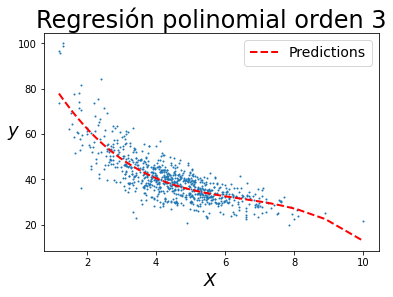

In [34]:


plt.scatter(X_train, y_train, s = 1)
plt.plot(X_train_ordenado, y_hat_3, "r--", linewidth=2, label="Predictions")

plt.title("Regresión polinomial orden 3", fontsize = 24)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);

In [35]:
#Cálculo de errores con los datos de entrenamiento

#Primero, voy a estimar los valores de los modelos con los datos de entrenamiento
y_hat_4 = lin_reg.predict(X_poly_train)


print('-------- Datos de entrenamiento -----------\n')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_4)))
print('r2_score',r2_score(y_train, y_hat_4))

#Cálculo de errores con los datos de prueba
y_hat_5 = lin_reg.predict(X_poly_test)

print('-------- Datos de prueba -----------\n')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_5)))
print('r2_score',r2_score(y_test, y_hat_5))

MAE.append(metrics.mean_absolute_error(y_test, y_hat_5))
R2.append(r2_score(y_test, y_hat_5))

-------- Datos de entrenamiento -----------

Error medio Absoluto (MAE): 4.492530226819379
Root Mean Squared Error: 5.992857738820005
r2_score 0.6713847043686217
-------- Datos de prueba -----------

Error medio Absoluto (MAE): 4.339059416327442
Root Mean Squared Error: 5.637445640824418
r2_score 0.7428388053898056


###Modelo con Ridge



In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge


CASO REGRESION RIDGE

Coeficientes de la regresión:  [-1.59199396e+00 -3.02016705e+00 -3.04862862e+00 -6.83052167e-01
  1.91377273e+00 -8.25227249e-01  1.68516170e-01 -1.85421134e-02
  1.06181589e-03 -2.48785335e-05]

Intersección de la regresión:  87.7488848496508


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.02561e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


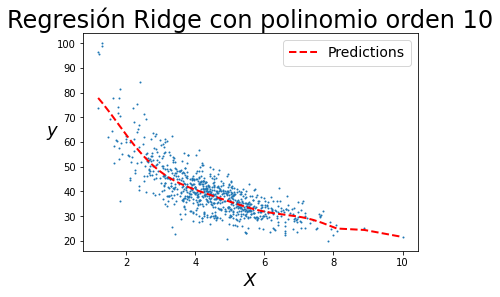

-------- Datos de entrenamiento ----------
Error medio Absoluto (MAE): 4.453910642976263
Root Mean Squared Error: 5.980777623390148
r2_score 0.6727081830493382


-------- Datos de prueba -----------
Error medio Absoluto (MAE): 4.343281125962723
Root Mean Squared Error: 5.62939034878691
r2_score 0.743573190668476


In [37]:
#___________________-RIDGE-______________________


#Aquí creo el constructor para generar la transformación polinomial. La voy a poner de un oden más alto.
poly_features = PolynomialFeatures(degree=10, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#Creo el constructor para la regresión lineal.
lin_reg = Ridge(alpha = 10, fit_intercept= True)

#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de los coeficientes
print("\nCASO REGRESION RIDGE")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


#________________________Espacio para generar la gráfica.

X_train_ordenado = np.sort(X_train, axis = 0)

X_poly_train_ordenado = poly_features.fit_transform(X_train_ordenado)

#Voy a calcular ahora los valores de la predicción del modelo ya ordenados
y_hat_ordenado = lin_reg.predict(X_poly_train_ordenado)


plt.scatter(X_train, y_train, s = 1)
plt.plot(X_train_ordenado, y_hat_ordenado, "r--", linewidth=2, label="Predictions")

plt.title("Regresión Ridge con polinomio orden 10", fontsize = 24)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);
plt.show()


#_______________________Espacio para generar las métricas de desempeño


#Primero, voy a estimar los valores de los modelos con los datos de entrenamiento
y_hat_entrenamiento= lin_reg.predict(X_poly_train)


print('-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_poly_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))

MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))

Ecuación Ridge

$\hat{y} =  -1.59X - 3.02X^2-3.05X^3 -0.68X^4+ 1.91X^5-0.83X^6+ 0.17X^7- 0.018X^8+ 0.0016X^9- 0.0000249X^10 +  109.51$

###Modelo con Lasso###




CASO REGRESION LASSO

Coeficientes de la regresión:  [-0.00000000e+00 -0.00000000e+00 -3.00170871e-01 -0.00000000e+00
  6.63310716e-03 -4.05833446e-05 -2.67040725e-05 -2.01903279e-06
 -2.93154665e-08  1.37772570e-08]

Intersección de la regresión:  56.03618819274688


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+04, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


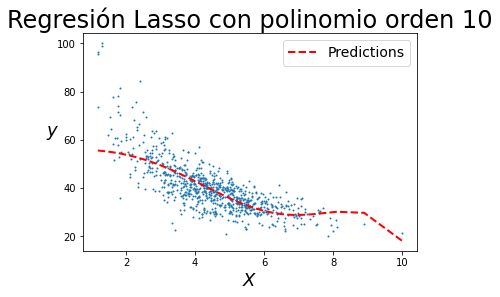

-------- Datos de entrenamiento ----------
Error medio Absoluto (MAE): 4.781479574840005
Root Mean Squared Error: 6.873916350189367
r2_score 0.5676571081831638


-------- Datos de prueba -----------
Error medio Absoluto (MAE): 4.853246864224334
Root Mean Squared Error: 7.206891712019044
r2_score 0.579721964801911


In [38]:
#___________________-LASSO-______________________


#Aquí creo el constructor para generar la transformación polinomial. La voy a poner de un oden más alto.
poly_features = PolynomialFeatures(degree=10, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#Creo el constructor para la regresión lineal.
lin_reg = Lasso(alpha = 10, fit_intercept= True)

#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de los coeficientes
print("\nCASO REGRESION LASSO")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


#________________________Espacio para generar la gráfica.

X_train_ordenado = np.sort(X_train, axis = 0)

X_poly_train_ordenado = poly_features.fit_transform(X_train_ordenado)

#Voy a calcular ahora los valores de la predicción del modelo ya ordenados
y_hat_ordenado = lin_reg.predict(X_poly_train_ordenado)


plt.scatter(X_train, y_train, s = 1)
plt.plot(X_train_ordenado, y_hat_ordenado, "r--", linewidth=2, label="Predictions")

plt.title("Regresión Lasso con polinomio orden 10", fontsize = 24)
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14);
plt.show()


#_______________________Espacio para generar las métricas de desempeño


#Primero, voy a estimar los valores de los modelos con los datos de entrenamiento
y_hat_entrenamiento= lin_reg.predict(X_poly_train)


print('-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_poly_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))

MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))

###MAE Y $R^2 DE LOS CUATRO MÉTODOS###

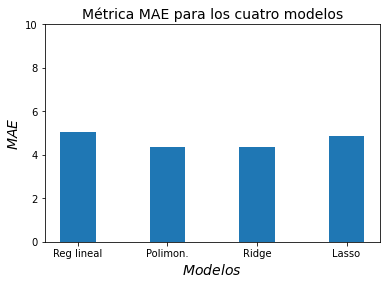

In [39]:
#Ya he llenado previamente los valore de las matrices. Ahora voy a graficarlas

modelos = ["Reg lineal", "Polimon.", "Ridge", "Lasso"]

plt.bar(modelos, MAE, width = 0.4)
plt.ylim(0, 10)
plt.xlabel("$Modelos$", fontsize=14)
plt.ylabel("$MAE$", rotation=90, fontsize=14)
plt.title("Métrica MAE para los cuatro modelos", fontsize=14);

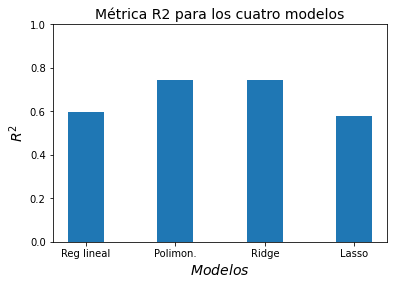

In [40]:
#Ya he llenado previamente los valore de las matrices. Ahora voy a graficarlas

modelos = ["Reg lineal", "Polimon.", "Ridge", "Lasso"]

plt.bar(modelos, R2, width = 0.4)
plt.ylim(0, 1)
plt.xlabel("$Modelos$", fontsize=14)
plt.ylabel("$R^2$", rotation=90, fontsize=14)
plt.title("Métrica R2 para los cuatro modelos", fontsize=14);

###Comentarios finales sobre los modelos.
* Las mejores métricas de desempeño se obtuvieron con los modelos Ridge y polinomiales. En ambos casos el MAE es del orden de 4.7 y el $R^2$ es de 75%. En comparación con los modelos Lasso y regresión lineal simple fueron los mejores resultados obtenidos.
* La conveniencia del uso del modelo dependerá de si para la empresa este 75% de precisión en la predicción es aceptable. Yo usaría la regresión Ridge pues tiene un comportamiento mejor en el extremo derecho de la distribución.
* Para el % de partición de los **datos de entrenamiento y validadción** Usé 80% para los datos de entrenamiento y los demás para prueba.
* **Sobre los errores**: Los errores de validación y prueba para todos los casos están muy similares por lo que entiendo que los modelos generados estima con el mismo error con los datos de prueba. En todo caso el coeficiente de correlación $R^2$ apenas del 75% puede mostrar que los modelos se encuentran subentrenados.



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


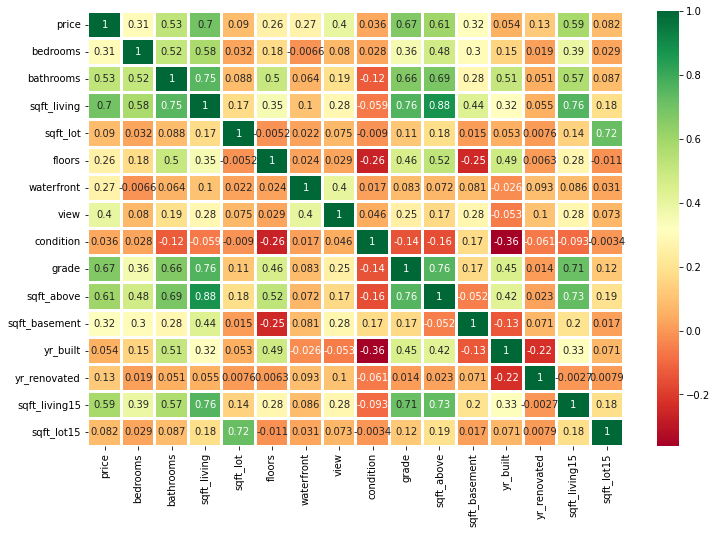

In [45]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths = 2)
plt.show()

In [46]:
#Aquí la maestra ya está generando los conjuntos X y Y

columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [47]:
#Aquí ya se han generado los datos de validación y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


#RUTA

1. Verificación de datos nulos.
2. Verificación de distribución de los datos para entender qué distribuciones debería aplicar
3. Partición de los datos
4. Formulación del pipeline
5. Entrenamiento del modelo y cálculo de métricas de desempeño.

In [48]:


#------------------------------REGRESION LINEAL---------------------------

#primero genero el cosntructor con la regresión lineal.
lin_reg = LinearRegression(fit_intercept=True)

#Luego entreno el modelo
lin_reg.fit(X_train, y_train)


#Obtengo los valores de pendiente e instersección

lin_reg.coef_, lin_reg.intercept_

#Imprimo aquí los valores de los coeficientes
print("\nCASO REGRESION LINEAL")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


"Calculo aquí los valores de las métricas de desempeño"

y_hat_entrenamiento= lin_reg.predict(X_train)


print('\n\n-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))

#Las siguientes líneas de código las pongo para poder tener el arreglo con todas las métricas que estoy generando
MAE = []
R2 = []

MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))


CASO REGRESION LINEAL

Coeficientes de la regresión:  [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]

Intersección de la regresión:  [6151359.2627409]


-------- Datos de entrenamiento ----------
Error medio Absoluto (MAE): 139269.32939115583
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


-------- Datos de prueba -----------
Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


In [49]:


#------------------------------REGRESION POLINOMIAL---------------------------

#Aquí creo el constructor para generar la transformación polinomial. Sólo interacciones de segundo orden.
poly_features = PolynomialFeatures(degree=2, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#primero genero el cosntructor con la regresión lineal.
lin_reg = LinearRegression(fit_intercept=True)

#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de pendiente e instersección

lin_reg.coef_, lin_reg.intercept_

#Imprimo aquí los valores de los coeficientes
print("\nCASO REGRESION POLINOMIAL")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


"Calculo aquí los valores de las métricas de desempeño"

y_hat_entrenamiento= lin_reg.predict(X_poly_train)


print('\n\n-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_poly_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))


MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))




CASO REGRESION POLINOMIAL

Coeficientes de la regresión:  [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01

In [50]:
#------------------------------REGRESION RIDGE---------------------------

#Aquí creo el constructor para generar la transformación polinomial. Sólo interacciones de segundo orden.
poly_features = PolynomialFeatures(degree=2, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#primero genero el cosntructor con la regresión lineal.
lin_reg = Ridge(alpha = 1.0, fit_intercept= True)

#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de pendiente e instersección

lin_reg.coef_, lin_reg.intercept_

#Imprimo aquí los valores de los coeficientes
print("\nCASO REGRESION POLINOMIAL")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


"Calculo aquí los valores de las métricas de desempeño"

y_hat_entrenamiento= lin_reg.predict(X_poly_train)


print('\n\n-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_poly_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))


MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))


CASO REGRESION POLINOMIAL

Coeficientes de la regresión:  [[ 4.60229790e+05 -2.83585413e+05 -4.55464410e+02 -2.82448011e+01
  -3.80402269e+05 -1.05185321e+05 -3.14232811e+05  2.78096459e+05
   4.58289840e+05 -4.76026296e+02 -1.00096362e+02 -9.44134661e+04
  -3.20983501e+03  4.23087633e+03 -3.23674215e+01  9.32986146e+02
   3.48742438e+03  5.43975087e+01 -2.14546577e-02  4.70502058e+03
  -2.56476409e+04  3.24879982e+02 -3.01444787e+03 -5.66059875e+03
  -6.66169999e+01 -8.02106332e+01 -2.22983571e+02 -4.78159577e+00
   1.54263885e+01  1.97165496e-01 -5.25211822e+03 -2.52928970e+01
  -1.30155764e-01 -1.47629184e+04  6.45325301e+04  2.42711649e+03
  -7.85325849e+03  1.77292578e+04  5.37640732e+01  4.16252730e+01
   1.06288743e+02 -2.44400242e+01 -1.18911213e+01 -2.73755715e-02
   7.88204211e+01  5.87436298e+01 -1.42333083e+01  7.07228388e+01
  -2.62685556e+00 -5.83766594e+00  6.93510243e+00 -1.88075328e+01
  -1.07351638e+01 -4.35856686e+01  1.09136165e+02  2.79321857e+01
   5.12600511e+01

In [51]:
#------------------------------REGRESION LASSO---------------------------

#Aquí creo el constructor para generar la transformación polinomial. Sólo interacciones de segundo orden.
poly_features = PolynomialFeatures(degree=2, include_bias=False)

#Transformación de X de entrenamiento  y prueba
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

#primero genero el cosntructor con la regresión lineal.
lin_reg = Lasso(alpha = 1.0, fit_intercept= True)

#Luego entreno el modelo
lin_reg.fit(X_poly_train, y_train)


#Obtengo los valores de pendiente e instersección

lin_reg.coef_, lin_reg.intercept_

#Imprimo aquí los valores de los coeficientes
print("\nCASO REGRESION POLINOMIAL")

print("\nCoeficientes de la regresión: ", lin_reg.coef_)
print("\nIntersección de la regresión: ", lin_reg.intercept_)


"Calculo aquí los valores de las métricas de desempeño"

y_hat_entrenamiento= lin_reg.predict(X_poly_train)


print('\n\n-------- Datos de entrenamiento ----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_hat_entrenamiento))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_entrenamiento)))
print('r2_score',r2_score(y_train, y_hat_entrenamiento))

#Cálculo de errores con los datos de prueba
y_hat_prueba = lin_reg.predict(X_poly_test)

print('\n\n-------- Datos de prueba -----------')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_hat_prueba))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_prueba)))
print('r2_score',r2_score(y_test, y_hat_prueba))


MAE.append(metrics.mean_absolute_error(y_test, y_hat_prueba))
R2.append(r2_score(y_test, y_hat_prueba))


CASO REGRESION POLINOMIAL

Coeficientes de la regresión:  [ 1.25146350e+05  1.53697177e+05  7.96659429e+01 -3.03090606e+00
 -4.62761060e+04  2.25762162e+05  7.69809611e+04  1.34009909e+05
  1.79959829e+05 -1.83114788e+02 -5.98522478e+01 -3.83208834e+03
 -2.47121236e+02  1.35046847e+02 -1.53284654e+00  1.07433010e+03
 -3.07147216e+03 -2.05681731e+01 -1.79188803e-01  8.09707963e+03
 -2.18675074e+04 -1.17766829e+02 -1.70826807e+03 -3.85569921e+03
  7.52096406e+00  2.98824177e-01 -6.22382161e+01  4.52689267e-02
  1.88863844e+01  2.66425000e-01  1.14417250e+03  4.56513666e+01
 -2.28612753e-02 -2.69241773e+04  5.51814316e+04  6.05414945e+03
 -1.99572193e+04  1.80739021e+04 -1.33537979e+01 -3.79298592e+01
 -6.83273628e+01 -2.72410643e+01 -3.39310989e+01  1.37007730e-01
  1.96437448e-02 -1.73712856e-04  4.26278282e+00 -6.63959685e+01
  3.21892856e+01 -1.28309830e+01  2.24899850e+01 -5.34030915e-02
  2.67701819e-02 -5.23450573e-02 -1.40186288e-03  1.54975675e-03
 -4.70484761e-04 -1.03271281e-0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.356e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Gráficas de las métricas de evaluación

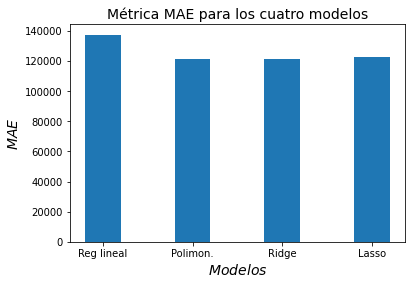

In [52]:

#Ya he llenado previamente los valore de las matrices. Ahora voy a graficarlas

modelos = ["Reg lineal", "Polimon.", "Ridge", "Lasso"]

#----------Gráfico de MAE----------

plt.bar(modelos, MAE, width = 0.4)
#plt.ylim(0, 10)
plt.xlabel("$Modelos$", fontsize=14)
plt.ylabel("$MAE$", rotation=90, fontsize=14)
plt.title("Métrica MAE para los cuatro modelos", fontsize=14);



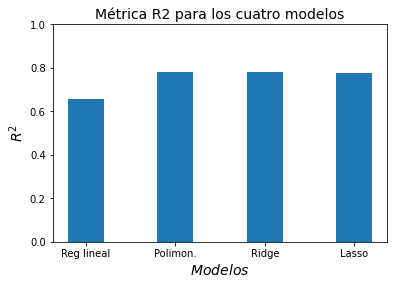

In [53]:

#----------Gráfico de R^2----------

modelos = ["Reg lineal", "Polimon.", "Ridge", "Lasso"]

plt.bar(modelos, R2, width = 0.4)
plt.ylim(0, 1)
plt.xlabel("$Modelos$", fontsize=14)
plt.ylabel("$R^2$", rotation=90, fontsize=14)
plt.title("Métrica R2 para los cuatro modelos", fontsize=14);